In [36]:
import pandas as pd
import numpy as np
import fcwt

In [37]:
df = pd.read_csv('data/agustin_picture_EEG.csv')

In [38]:
df

,Unnamed: 0,EEG_channel_name,par_id,Stim_name,Stim_cat,valence,arousal,Msec_0,Msec_0.002,Msec_0.004,...,Msec_1.982,Msec_1.984,Msec_1.986,Msec_1.988,Msec_1.99,Msec_1.992,Msec_1.994,Msec_1.996,Msec_1.998,Msec_2
0,1,AF3,1,Avalanche,Unpleasant,7,7,2.499745,2.822661,3.160681,...,-8.938774,-8.604923,-8.160391,-7.639040,-7.158571,-6.754404,-6.509094,-6.466125,-6.640604,-7.007530
1,2,AF4,1,Avalanche,Unpleasant,7,7,-1.033301,-0.772887,-0.403616,...,12.996881,13.049486,13.025266,13.015371,12.995840,13.025007,13.082819,13.188287,13.295057,13.365631
2,3,AF7,1,Avalanche,Unpleasant,7,7,1.942053,1.764969,1.571743,...,3.941007,4.087362,4.281892,4.490747,4.596216,4.594133,4.433197,4.163665,3.739187,3.309761
3,4,AF8,1,Avalanche,Unpleasant,7,7,-1.747841,-1.549926,-1.180656,...,21.032322,21.647427,22.185706,22.613310,22.968777,23.185444,23.274508,23.286225,23.236747,23.119820
4,5,AFF1H,1,Avalanche,Unpleasant,7,7,2.079673,2.527589,3.115610,...,2.547381,2.568736,2.544518,2.565871,2.608838,2.638005,2.633319,2.582538,2.470558,2.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,440444,TP9,50,urban_storm,Unpleasant,2,6,-3.620753,-4.261375,-4.904948,...,-13.863068,-14.437065,-14.943550,-15.397263,-15.743077,-15.980399,-16.087416,-16.075034,-16.019609,-15.937947
440444,440445,TPP7H,50,urban_storm,Unpleasant,2,6,-2.038424,-2.366548,-2.697621,...,5.687977,5.082730,4.482495,3.935032,3.495469,3.133146,2.901131,2.726013,2.562688,2.394351
440445,440446,TPP8H,50,urban_storm,Unpleasant,2,6,-0.567273,-0.239148,0.148528,...,22.034101,22.241352,22.422367,22.593652,22.654087,22.635514,22.528499,22.384631,22.252555,22.177968
440446,440447,TTP7H,50,urban_storm,Unpleasant,2,6,-2.302246,-2.536621,-2.836443,...,17.080384,16.943886,16.843651,16.796186,16.762872,16.806800,16.856033,16.962165,17.017589,17.068002


In [39]:
downsampled_df = pd.DataFrame()
downsampled_df = df.iloc[:, :7].copy()
for i in range(7, df.shape[1], 4):
    downsampled_df[i] = df.iloc[:, i:i+4].mean(axis=1)
downsampled_df

/tmp/ipykernel_170335/4275464854.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  downsampled_df[i] = df.iloc[:, i:i+4].mean(axis=1)
/tmp/ipykernel_170335/4275464854.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  downsampled_df[i] = df.iloc[:, i:i+4].mean(axis=1)
/tmp/ipykernel_170335/4275464854.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

,Unnamed: 0,EEG_channel_name,par_id,Stim_name,Stim_cat,valence,arousal,7,11,15,...,995,999,1003,1007,1011,1015,1019,1023,1027,1031
0,1,AF3,1,Avalanche,Unpleasant,7,7,3.014653,4.882683,7.331507,...,-11.030568,-12.027180,-12.709992,-11.497365,-9.351600,-8.763646,-9.094636,-7.890731,-6.592557,-7.007530
1,2,AF4,1,Avalanche,Unpleasant,7,7,-0.534019,1.435575,3.712523,...,2.678541,1.892865,0.256932,0.375812,4.474695,9.820455,12.622273,13.021491,13.147792,13.365631
2,3,AF7,1,Avalanche,Unpleasant,7,7,1.683525,1.942185,4.609758,...,6.935143,5.555719,4.865096,5.398037,5.754742,4.842700,3.949211,4.364054,4.232546,3.309761
3,4,AF8,1,Avalanche,Unpleasant,7,7,-1.311059,-0.028966,-0.314512,...,10.081171,8.279872,7.745498,9.965938,13.924198,17.309023,20.048340,22.353805,23.245731,23.119820
4,5,AFF1H,1,Avalanche,Unpleasant,7,7,2.875831,5.696985,8.395808,...,-4.669403,-4.720704,-5.262890,-5.495572,-3.045122,0.660015,2.407147,2.571991,2.581105,2.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,440444,TP9,50,urban_storm,Unpleasant,2,6,-4.563778,-6.292844,-6.590234,...,-20.186686,-19.777857,-17.691850,-14.223917,-11.791433,-11.525366,-13.042168,-15.130239,-16.040614,-15.937947
440444,440445,TPP7H,50,urban_storm,Unpleasant,2,6,-2.528326,-3.546455,-4.328219,...,3.723727,2.945058,3.648255,4.850567,5.954928,6.939744,6.383878,4.248932,2.830745,2.394351
440445,440446,TPP8H,50,urban_storm,Unpleasant,2,6,-0.025926,1.190316,0.877300,...,23.858906,23.830236,22.963123,23.204500,23.590113,22.590556,21.917503,22.477865,22.450300,22.177968
440446,440447,TTP7H,50,urban_storm,Unpleasant,2,6,-2.714023,-4.099339,-5.521726,...,13.358324,13.782778,15.103162,15.953912,16.495774,17.105590,17.198161,16.836649,16.910647,17.068002


In [40]:
# for index, row in downsampled_df.iterrows(): # old method of getting emotional class
#     valence, arousal = row["valence"], row["arousal"]
#     if valence < 4.5 and arousal < 4.5: # LVLA
#         cls = 0
#     elif valence < 4.5:                 # LVHA
#         cls = 1
#     elif arousal < 4.5:                 # HVLA
#         cls = 2
#     else:                               # HVHA
#         cls = 3
#     downsampled_df.at[index, "class"] = cls

for index, row in downsampled_df.iterrows():
    category = row["Stim_cat"]
    if category == "Unpleasant":
        cls = 0
    elif category == "Neutral":
        cls = 1
    elif category == "Pleasant":
        cls = 2
    else:
        print("Unknown category found: ", category)
    downsampled_df.at[index, "class"] = cls

/tmp/ipykernel_170335/1677759910.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  downsampled_df.at[index, "class"] = cls


In [41]:
downsampled_df

,Unnamed: 0,EEG_channel_name,par_id,Stim_name,Stim_cat,valence,arousal,7,11,15,...,999,1003,1007,1011,1015,1019,1023,1027,1031,class
0,1,AF3,1,Avalanche,Unpleasant,7,7,3.014653,4.882683,7.331507,...,-12.027180,-12.709992,-11.497365,-9.351600,-8.763646,-9.094636,-7.890731,-6.592557,-7.007530,0.0
1,2,AF4,1,Avalanche,Unpleasant,7,7,-0.534019,1.435575,3.712523,...,1.892865,0.256932,0.375812,4.474695,9.820455,12.622273,13.021491,13.147792,13.365631,0.0
2,3,AF7,1,Avalanche,Unpleasant,7,7,1.683525,1.942185,4.609758,...,5.555719,4.865096,5.398037,5.754742,4.842700,3.949211,4.364054,4.232546,3.309761,0.0
3,4,AF8,1,Avalanche,Unpleasant,7,7,-1.311059,-0.028966,-0.314512,...,8.279872,7.745498,9.965938,13.924198,17.309023,20.048340,22.353805,23.245731,23.119820,0.0
4,5,AFF1H,1,Avalanche,Unpleasant,7,7,2.875831,5.696985,8.395808,...,-4.720704,-5.262890,-5.495572,-3.045122,0.660015,2.407147,2.571991,2.581105,2.228632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,440444,TP9,50,urban_storm,Unpleasant,2,6,-4.563778,-6.292844,-6.590234,...,-19.777857,-17.691850,-14.223917,-11.791433,-11.525366,-13.042168,-15.130239,-16.040614,-15.937947,0.0
440444,440445,TPP7H,50,urban_storm,Unpleasant,2,6,-2.528326,-3.546455,-4.328219,...,2.945058,3.648255,4.850567,5.954928,6.939744,6.383878,4.248932,2.830745,2.394351,0.0
440445,440446,TPP8H,50,urban_storm,Unpleasant,2,6,-0.025926,1.190316,0.877300,...,23.830236,22.963123,23.204500,23.590113,22.590556,21.917503,22.477865,22.450300,22.177968,0.0
440446,440447,TTP7H,50,urban_storm,Unpleasant,2,6,-2.714023,-4.099339,-5.521726,...,13.782778,15.103162,15.953912,16.495774,17.105590,17.198161,16.836649,16.910647,17.068002,0.0


In [42]:
downsampled_df = downsampled_df.drop(columns=["Unnamed: 0", "valence", "arousal"])

In [43]:
cols = list(downsampled_df.columns)
cols.insert(2, cols.pop(-1))
downsampled_df = downsampled_df[cols]
downsampled_df

,EEG_channel_name,par_id,class,Stim_name,Stim_cat,7,11,15,19,23,...,995,999,1003,1007,1011,1015,1019,1023,1027,1031
0,AF3,1,0.0,Avalanche,Unpleasant,3.014653,4.882683,7.331507,8.068289,6.259113,...,-11.030568,-12.027180,-12.709992,-11.497365,-9.351600,-8.763646,-9.094636,-7.890731,-6.592557,-7.007530
1,AF4,1,0.0,Avalanche,Unpleasant,-0.534019,1.435575,3.712523,5.207117,4.265126,...,2.678541,1.892865,0.256932,0.375812,4.474695,9.820455,12.622273,13.021491,13.147792,13.365631
2,AF7,1,0.0,Avalanche,Unpleasant,1.683525,1.942185,4.609758,6.346538,4.576424,...,6.935143,5.555719,4.865096,5.398037,5.754742,4.842700,3.949211,4.364054,4.232546,3.309761
3,AF8,1,0.0,Avalanche,Unpleasant,-1.311059,-0.028966,-0.314512,-0.921476,-1.410344,...,10.081171,8.279872,7.745498,9.965938,13.924198,17.309023,20.048340,22.353805,23.245731,23.119820
4,AFF1H,1,0.0,Avalanche,Unpleasant,2.875831,5.696985,8.395808,9.327903,7.885913,...,-4.669403,-4.720704,-5.262890,-5.495572,-3.045122,0.660015,2.407147,2.571991,2.581105,2.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,TP9,50,0.0,urban_storm,Unpleasant,-4.563778,-6.292844,-6.590234,-6.881286,-7.324239,...,-20.186686,-19.777857,-17.691850,-14.223917,-11.791433,-11.525366,-13.042168,-15.130239,-16.040614,-15.937947
440444,TPP7H,50,0.0,urban_storm,Unpleasant,-2.528326,-3.546455,-4.328219,-5.252083,-4.726287,...,3.723727,2.945058,3.648255,4.850567,5.954928,6.939744,6.383878,4.248932,2.830745,2.394351
440445,TPP8H,50,0.0,urban_storm,Unpleasant,-0.025926,1.190316,0.877300,0.062811,0.205795,...,23.858906,23.830236,22.963123,23.204500,23.590113,22.590556,21.917503,22.477865,22.450300,22.177968
440446,TTP7H,50,0.0,urban_storm,Unpleasant,-2.714023,-4.099339,-5.521726,-6.226840,-5.372921,...,13.358324,13.782778,15.103162,15.953912,16.495774,17.105590,17.198161,16.836649,16.910647,17.068002


In [44]:
downsampled_df.rename(columns={"EEG_channel_name": "channel"}, inplace=True)
#downsampled_df.rename(columns={"Stim_name": "stimulus"}, inplace=True)
new_columns = ["channel", "par_id", "class", "Stim_name", "Stim_cat"]  # Keep these columns unchanged
new_columns += [str(i) for i in range(1, len(downsampled_df.columns) - 5 + 1)]
downsampled_df.columns = new_columns
downsampled_df

,channel,par_id,class,Stim_name,Stim_cat,1,2,3,4,5,...,248,249,250,251,252,253,254,255,256,257
0,AF3,1,0.0,Avalanche,Unpleasant,3.014653,4.882683,7.331507,8.068289,6.259113,...,-11.030568,-12.027180,-12.709992,-11.497365,-9.351600,-8.763646,-9.094636,-7.890731,-6.592557,-7.007530
1,AF4,1,0.0,Avalanche,Unpleasant,-0.534019,1.435575,3.712523,5.207117,4.265126,...,2.678541,1.892865,0.256932,0.375812,4.474695,9.820455,12.622273,13.021491,13.147792,13.365631
2,AF7,1,0.0,Avalanche,Unpleasant,1.683525,1.942185,4.609758,6.346538,4.576424,...,6.935143,5.555719,4.865096,5.398037,5.754742,4.842700,3.949211,4.364054,4.232546,3.309761
3,AF8,1,0.0,Avalanche,Unpleasant,-1.311059,-0.028966,-0.314512,-0.921476,-1.410344,...,10.081171,8.279872,7.745498,9.965938,13.924198,17.309023,20.048340,22.353805,23.245731,23.119820
4,AFF1H,1,0.0,Avalanche,Unpleasant,2.875831,5.696985,8.395808,9.327903,7.885913,...,-4.669403,-4.720704,-5.262890,-5.495572,-3.045122,0.660015,2.407147,2.571991,2.581105,2.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,TP9,50,0.0,urban_storm,Unpleasant,-4.563778,-6.292844,-6.590234,-6.881286,-7.324239,...,-20.186686,-19.777857,-17.691850,-14.223917,-11.791433,-11.525366,-13.042168,-15.130239,-16.040614,-15.937947
440444,TPP7H,50,0.0,urban_storm,Unpleasant,-2.528326,-3.546455,-4.328219,-5.252083,-4.726287,...,3.723727,2.945058,3.648255,4.850567,5.954928,6.939744,6.383878,4.248932,2.830745,2.394351
440445,TPP8H,50,0.0,urban_storm,Unpleasant,-0.025926,1.190316,0.877300,0.062811,0.205795,...,23.858906,23.830236,22.963123,23.204500,23.590113,22.590556,21.917503,22.477865,22.450300,22.177968
440446,TTP7H,50,0.0,urban_storm,Unpleasant,-2.714023,-4.099339,-5.521726,-6.226840,-5.372921,...,13.358324,13.782778,15.103162,15.953912,16.495774,17.105590,17.198161,16.836649,16.910647,17.068002


In [45]:
downsampled_df = downsampled_df.iloc[:, :-1]
downsampled_df

,channel,par_id,class,Stim_name,Stim_cat,1,2,3,4,5,...,247,248,249,250,251,252,253,254,255,256
0,AF3,1,0.0,Avalanche,Unpleasant,3.014653,4.882683,7.331507,8.068289,6.259113,...,-10.549776,-11.030568,-12.027180,-12.709992,-11.497365,-9.351600,-8.763646,-9.094636,-7.890731,-6.592557
1,AF4,1,0.0,Avalanche,Unpleasant,-0.534019,1.435575,3.712523,5.207117,4.265126,...,3.628084,2.678541,1.892865,0.256932,0.375812,4.474695,9.820455,12.622273,13.021491,13.147792
2,AF7,1,0.0,Avalanche,Unpleasant,1.683525,1.942185,4.609758,6.346538,4.576424,...,7.595625,6.935143,5.555719,4.865096,5.398037,5.754742,4.842700,3.949211,4.364054,4.232546
3,AF8,1,0.0,Avalanche,Unpleasant,-1.311059,-0.028966,-0.314512,-0.921476,-1.410344,...,12.577587,10.081171,8.279872,7.745498,9.965938,13.924198,17.309023,20.048340,22.353805,23.245731
4,AFF1H,1,0.0,Avalanche,Unpleasant,2.875831,5.696985,8.395808,9.327903,7.885913,...,-3.540173,-4.669403,-4.720704,-5.262890,-5.495572,-3.045122,0.660015,2.407147,2.571991,2.581105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440443,TP9,50,0.0,urban_storm,Unpleasant,-4.563778,-6.292844,-6.590234,-6.881286,-7.324239,...,-20.671576,-20.186686,-19.777857,-17.691850,-14.223917,-11.791433,-11.525366,-13.042168,-15.130239,-16.040614
440444,TPP7H,50,0.0,urban_storm,Unpleasant,-2.528326,-3.546455,-4.328219,-5.252083,-4.726287,...,4.887271,3.723727,2.945058,3.648255,4.850567,5.954928,6.939744,6.383878,4.248932,2.830745
440445,TPP8H,50,0.0,urban_storm,Unpleasant,-0.025926,1.190316,0.877300,0.062811,0.205795,...,22.686517,23.858906,23.830236,22.963123,23.204500,23.590113,22.590556,21.917503,22.477865,22.450300
440446,TTP7H,50,0.0,urban_storm,Unpleasant,-2.714023,-4.099339,-5.521726,-6.226840,-5.372921,...,14.428119,13.358324,13.782778,15.103162,15.953912,16.495774,17.105590,17.198161,16.836649,16.910647


In [46]:
downsampled_df.to_csv("data/preprocessed_picture.csv", index=False)

In [2]:
fs = 128 
f0 = 4   # lowest frequency
f1 = 45  # highest frequency
fn = 128 # number of frequencies, match channel number for square frame

print("opening dataset...")
df = pd.read_csv('data/preprocessed_picture.csv')
print("dataset opened.")

# Select only one trial: take the first participant and its first stimulus
first_participant = df['par_id'].unique()[0]
participant_rows = df[df['par_id'] == first_participant]
first_stimulus = participant_rows['stimulus'].unique()[0]
trial_rows = participant_rows[participant_rows['stimulus'] == first_stimulus]
cls = trial_rows.iloc[0]["class"]

# Process the trial to compute continuous wavelet transforms (CWT)
total_cwt = np.zeros((128 * fn, 256))  # image containing CWT values for all channels

for channel, (_, row) in enumerate(trial_rows.iterrows()):
    signal_cols = [str(i) for i in range(1, 257)]
    signal = row[signal_cols].to_numpy()
    # It is assumed that fcwt.cwt returns (frequencies, cwt_matrix)
    _, current_cwt = fcwt.cwt(signal, fs, f0, f1, fn)
    start = channel * fn
    end = (channel + 1) * fn
    total_cwt[start:end, :] = abs(current_cwt)

# Create a list of frames for the trial from the CWT output
all_frames = []
for sample in range(256):
    frame = np.zeros((128, 128))
    for channel in range(128):
        start = channel * fn
        end = (channel + 1) * fn
        frame[:, channel] = total_cwt[start:end, sample]
    norm_frame = (frame - frame.min()) / (frame.max() - frame.min())  # normalize frame
    scaled_frame = (norm_frame * 255).astype(np.uint8)               # scale to 0-255 for video
    all_frames.append(scaled_frame)

# Capture only the first clip of the trial (one 2-second window)
window_size = 2 * fs  # 2 seconds * 128 Hz
clip = all_frames[:window_size] if 1280 >= window_size else all_frames

print("Captured one trial with class:", cls)

opening dataset...
dataset opened.
Captured one trial with class: 3.0


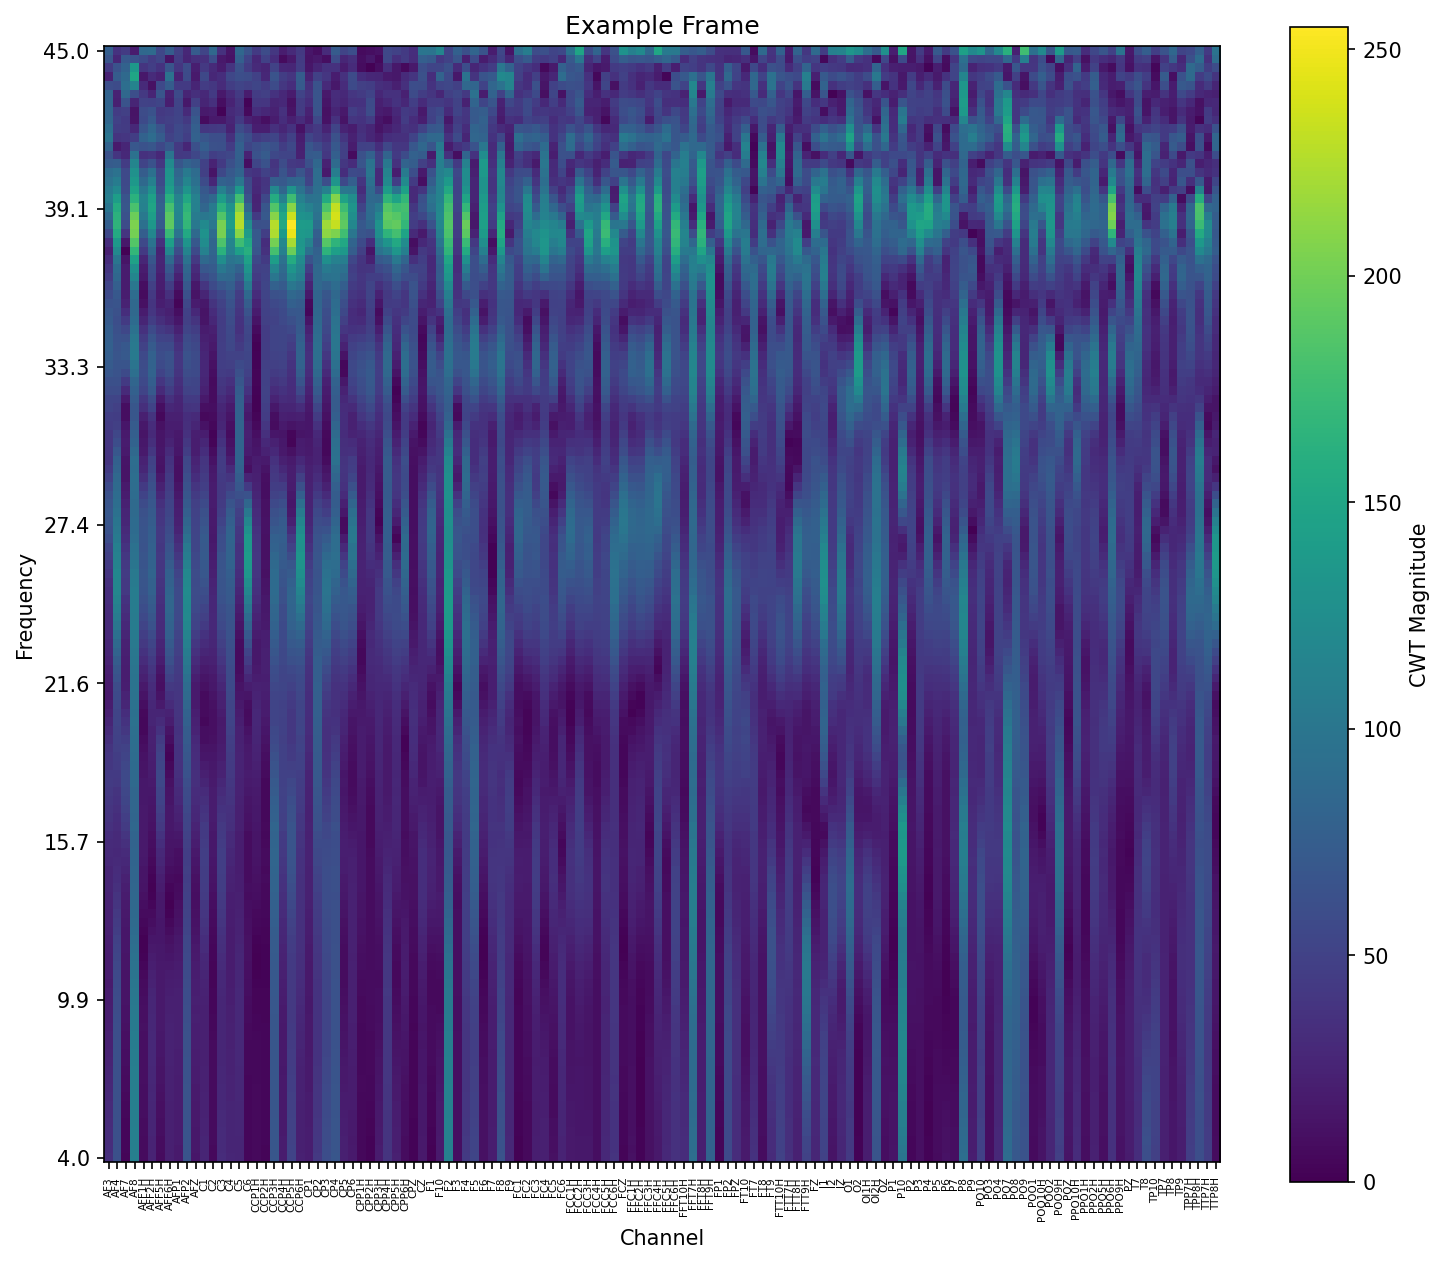

In [9]:
import matplotlib.pyplot as plt
channel_names = df['channel'].unique()
plt.figure(figsize=(12, 10), dpi=150)
plt.imshow(all_frames[0], origin='lower')
plt.title("Example Frame")
plt.xlabel("Channel")
plt.ylabel("Frequency")
tick_positions = np.linspace(0, 127, 8)
tick_labels = np.linspace(f0, f1, 8)
plt.yticks(tick_positions, ["{:.1f}".format(val) for val in tick_labels])
plt.xticks(np.arange(128), channel_names, rotation='vertical', fontsize=5)
plt.colorbar().set_label("CWT Magnitude")

In [ ]:
from array2gif import write_gif
gif_dataset = np.array(all_frames)
print("Dataset shape:", gif_dataset.shape)
gif_dataset_rgb = np.stack([gif_dataset]*3, axis=-1)
write_gif(gif_dataset_rgb, 'test.gif', fps = 128)

Dataset shape: (256, 128, 128)
